In [1]:
import os, sys
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath(''))))

import dropbox
from zipfile import ZipFile
import pandas as pd
from utils.data_extract_utils import extract_zip

# Connect to dropbox
dbx = dropbox.Dropbox('cHV7yAR0J6YAAAAAAAAAAVQ1NLCrOwerbaNltPWHslYXKuUTJ5_wfgJsuFcmx83o')

In [2]:
# Download, and extract data from dropbox into memory. 
data = {}
for entry in dbx.files_list_folder('').entries:
    response = dbx.files_download('/{}'.format(entry.name))
    
    if 'zip' in entry.name:
        content = extract_zip(response[1].content)
    
        for file in content:
            df = pd.read_csv(file[1])
            data[entry.name.replace('.csv.zip', '')] = df

In [3]:
print(data.keys())

dict_keys(['application_test', 'application_train', 'bureau_balance', 'bureau', 'credit_card_balance', 'installments_payments', 'POS_CASH_balance', 'previous_application'])


In [4]:
display(data['bureau'].info())
display(data['bureau'].head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


None

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [5]:
display(data['bureau_balance'].info())
display(data['bureau_balance'].head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


None

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


### Missing Data

In [6]:
display(data['bureau'].info(null_counts=True))
display(data['bureau_balance'].info(null_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_CURR              1716428 non-null  int64  
 1   SK_ID_BUREAU            1716428 non-null  int64  
 2   CREDIT_ACTIVE           1716428 non-null  object 
 3   CREDIT_CURRENCY         1716428 non-null  object 
 4   DAYS_CREDIT             1716428 non-null  int64  
 5   CREDIT_DAY_OVERDUE      1716428 non-null  int64  
 6   DAYS_CREDIT_ENDDATE     1610875 non-null  float64
 7   DAYS_ENDDATE_FACT       1082775 non-null  float64
 8   AMT_CREDIT_MAX_OVERDUE  591940 non-null   float64
 9   CNT_CREDIT_PROLONG      1716428 non-null  int64  
 10  AMT_CREDIT_SUM          1716415 non-null  float64
 11  AMT_CREDIT_SUM_DEBT     1458759 non-null  float64
 12  AMT_CREDIT_SUM_LIMIT    1124648 non-null  float64
 13  AMT_CREDIT_SUM_OVERDUE  1716428 non-null  float64
 14  CR

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Non-Null Count     Dtype 
---  ------          --------------     ----- 
 0   SK_ID_BUREAU    27299925 non-null  int64 
 1   MONTHS_BALANCE  27299925 non-null  int64 
 2   STATUS          27299925 non-null  object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


None

Every column in `bureau_balance` has values, so we don't need to do anything about missing counts. However, `bureau` has missing values for `DAYS_CREDIT_ENDDATE`, `DAYS_ENDDATE_FACT`, `AMT_CREDIT_MAX_OVERDUE`, `AMT_CREDIT_SUM_DEBT`, `AMT_CREDIT_SUM_LIMIT`, and `AMT_ANNUITY`.

For now, lets ignore `DAYS_CREDIT_ENDDATE`, `DAYS_ENDDATE_FACT` since those refer to remaining duration or time since credit was closed. A feature we can potentially use but as of now lets avoid since other features we believe may give a better signal.

For the AMT_CREDIT_* fields we can probably utilize the ratio of AMT_CREDIT_SUM_DEBT/AMT_CREDIT_SUM to determine what percentage of the user's credit limit is currently used. For now we can start with setting N/A values in AMT_CREDIT_SUM_DEBT as zero, since have a value here might be a big contributor to the target and therefore it's better to avoid false positives triggered by an interpolated value in AMT_CREDIT_SUM_DEBT. 

In [7]:
data['bureau']['AMT_CREDIT_SUM_DEBT'] = data['bureau']['AMT_CREDIT_SUM_DEBT'].fillna(value=0)
data['bureau']['AMT_CREDIT_DEBT_RATIO'] =  data['bureau']['AMT_CREDIT_SUM_DEBT']/data['bureau']['AMT_CREDIT_SUM']
data['bureau']['AMT_CREDIT_DEBT_RATIO'] = data['bureau']['AMT_CREDIT_DEBT_RATIO'].fillna(value=0)

In [8]:
display(data['bureau']['AMT_CREDIT_DEBT_RATIO'].head())

0    0.00000
1    0.76152
2    0.00000
3    0.00000
4    0.00000
Name: AMT_CREDIT_DEBT_RATIO, dtype: float64

In [9]:
display(data['bureau'].info(null_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 18 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_CURR              1716428 non-null  int64  
 1   SK_ID_BUREAU            1716428 non-null  int64  
 2   CREDIT_ACTIVE           1716428 non-null  object 
 3   CREDIT_CURRENCY         1716428 non-null  object 
 4   DAYS_CREDIT             1716428 non-null  int64  
 5   CREDIT_DAY_OVERDUE      1716428 non-null  int64  
 6   DAYS_CREDIT_ENDDATE     1610875 non-null  float64
 7   DAYS_ENDDATE_FACT       1082775 non-null  float64
 8   AMT_CREDIT_MAX_OVERDUE  591940 non-null   float64
 9   CNT_CREDIT_PROLONG      1716428 non-null  int64  
 10  AMT_CREDIT_SUM          1716415 non-null  float64
 11  AMT_CREDIT_SUM_DEBT     1716428 non-null  float64
 12  AMT_CREDIT_SUM_LIMIT    1124648 non-null  float64
 13  AMT_CREDIT_SUM_OVERDUE  1716428 non-null  float64
 14  CR

None

### Data Validity

C    13646993
0     7499507
X     5810482
1      242347
5       62406
2       23419
3        8924
4        5847
Name: STATUS, dtype: int64


<AxesSubplot:>

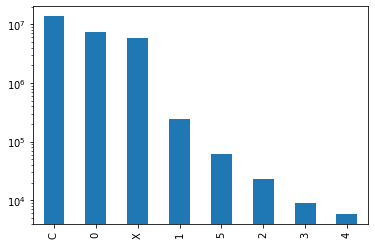

In [10]:
# Count unique values for Status
print(data['bureau_balance']['STATUS'].value_counts())
data['bureau_balance']['STATUS'].value_counts().plot(kind='bar', logy=True)

In [11]:
data['bureau']['SK_ID_BUREAU'].is_unique
bureau_df = data['bureau'].set_index('SK_ID_BUREAU')

In [12]:
# Check if every 'SK_ID_BUREAU' has a value in balances
data['bureau_balance']['SK_ID_BUREAU'].nunique()

817395

Therefore not every credit application has a balance sheet.
Some further [info](https://www.kaggle.com/c/home-credit-default-risk/discussion/57562)
We can probably use the previous balance of info as a signal

In [ ]:
DPD_STATUS_MAP = {
    'C': 0, 
    'X': 0,
    '0': 0,
    '1': 1,
    '2': 2,
    '3': 3,
    '4': 4,
    '5': 5,
}
def sum_of_dpd(x):
    sum = 0
    for i in x['STATUS']:
        sum += DPD_STATUS_MAP[i]
    return sum

dpd_counts_df = data['bureau_balance'].groupby(['SK_ID_BUREAU']).apply(sum_of_dpd)

In [14]:
dpd_counts_df = pd.DataFrame(dpd_counts_df, columns=['DPD_COUNTS']);
bureau_with_dpds = pd.concat([bureau_df, dpd_counts_df], axis=1)
bureau_with_dpds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1759469 entries, 5000000 to 6843457
Data columns (total 18 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              float64
 1   CREDIT_ACTIVE           object 
 2   CREDIT_CURRENCY         object 
 3   DAYS_CREDIT             float64
 4   CREDIT_DAY_OVERDUE      float64
 5   DAYS_CREDIT_ENDDATE     float64
 6   DAYS_ENDDATE_FACT       float64
 7   AMT_CREDIT_MAX_OVERDUE  float64
 8   CNT_CREDIT_PROLONG      float64
 9   AMT_CREDIT_SUM          float64
 10  AMT_CREDIT_SUM_DEBT     float64
 11  AMT_CREDIT_SUM_LIMIT    float64
 12  AMT_CREDIT_SUM_OVERDUE  float64
 13  CREDIT_TYPE             object 
 14  DAYS_CREDIT_UPDATE      float64
 15  AMT_ANNUITY             float64
 16  AMT_CREDIT_DEBT_RATIO   float64
 17  DPD_COUNTS              float64
dtypes: float64(15), object(3)
memory usage: 255.0+ MB


Now that `bureau_with_dpds` contains the bureau and `bureau_balance` data (where `HAS_DPD` determines whether there were historical late payments, we should verify whether the original column `CREDIT_DAY_OVERDUE` > 0 when `HAS_DPD` is true.

In [15]:
# Check if there were DPD_COUNTS == 0  where the column value for CREDIT_DAY_OVERDUE is true
display(bureau_with_dpds[(bureau_with_dpds['CREDIT_DAY_OVERDUE'] > 0) & (bureau_with_dpds['DPD_COUNTS'] == 0)])

# Take a sample of data to check
display(data['bureau'][data['bureau']['SK_ID_BUREAU'] == 5008880])
display(data['bureau_balance'][data['bureau_balance']['SK_ID_BUREAU'] == 5008880])

# CHeck to see if there were DPD_COUNTS where the column value for CREDIT_DAY_OVERDUE is 0
display(bureau_with_dpds[(bureau_with_dpds['CREDIT_DAY_OVERDUE'] == 0) & (bureau_with_dpds['DPD_COUNTS'] > 0)])
display(data['bureau'][data['bureau']['SK_ID_BUREAU'] == 5001718])
display(data['bureau_balance'][data['bureau_balance']['SK_ID_BUREAU'] == 5001718])

,SK_ID_CURR,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,AMT_CREDIT_DEBT_RATIO,DPD_COUNTS
SK_ID_BUREAU,,,,,,,,,,,,,,,,,,
5008880,151216.0,Active,currency 1,-331.0,8.0,764.0,NaN,NaN,0.0,572188.500,0.000,NaN,108.000,Consumer credit,-2.0,0.000,0.000000,0.0
5009629,263532.0,Active,currency 1,-1324.0,12.0,-228.0,NaN,NaN,0.0,225000.000,80365.500,NaN,22.500,Credit card,-20.0,0.000,0.357180,0.0
5009820,154094.0,Active,currency 1,-263.0,139.0,-79.0,NaN,125.550,0.0,45850.860,11497.095,0.000,125.550,Consumer credit,-139.0,3462.435,0.250750,0.0
5011643,326145.0,Active,currency 1,-285.0,30.0,111.0,NaN,NaN,0.0,163403.325,61223.355,NaN,464.535,Consumer credit,-39.0,NaN,0.374676,0.0
5012280,448422.0,Active,currency 1,-359.0,13.0,736.0,NaN,NaN,0.0,1183500.000,172746.000,NaN,7911.000,Consumer credit,-9.0,8581.500,0.145962,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6836870,385497.0,Active,currency 1,-104.0,30.0,230.0,NaN,NaN,0.0,22480.200,16134.840,NaN,112.500,Consumer credit,-3.0,6750.000,0.717736,0.0
6837892,161215.0,Active,currency 1,-350.0,10.0,1476.0,NaN,NaN,0.0,272520.000,250663.500,NaN,49.500,Consumer credit,-10.0,NaN,0.919799,0.0
6839653,153931.0,Active,currency 1,-2897.0,60.0,-2715.0,NaN,NaN,0.0,24403.500,0.000,NaN,333.000,Consumer credit,-471.0,0.000,0.000000,0.0


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,AMT_CREDIT_DEBT_RATIO
68928,151216,5008880,Active,currency 1,-331,8,764.0,NaN,NaN,0,572188.5,0.0,NaN,108.0,Consumer credit,-2,0.0,0.0


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
2940489,5008880,0,C
2940490,5008880,-1,C
2940491,5008880,-2,C
2940492,5008880,-3,C
2940493,5008880,-4,C
2940494,5008880,-5,0
2940495,5008880,-6,0
2940496,5008880,-7,0
2940497,5008880,-8,0
2940498,5008880,-9,0


,SK_ID_CURR,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,AMT_CREDIT_DEBT_RATIO,DPD_COUNTS
SK_ID_BUREAU,,,,,,,,,,,,,,,,,,
5001718,350740.0,Closed,currency 1,-1183.0,0.0,-88.0,-84.0,NaN,0.0,720000.00,0.0,0.0,0.0,Consumer credit,-77.0,0.000,0.000000,2.0
5001720,350740.0,Active,currency 1,-1090.0,0.0,371.0,NaN,16348.500,0.0,540000.00,0.0,NaN,0.0,Consumer credit,-22.0,16344.000,0.000000,7.0
5001722,350740.0,Closed,currency 1,-2610.0,0.0,-785.0,-1180.0,14697.000,0.0,585000.00,0.0,NaN,0.0,Consumer credit,-1180.0,NaN,0.000000,20.0
5001757,308565.0,Active,currency 1,-612.0,0.0,1214.0,NaN,NaN,0.0,765000.00,178641.0,0.0,0.0,Consumer credit,-3.0,5841.000,0.233518,1.0
5001786,370027.0,Closed,currency 1,-1772.0,0.0,-1041.0,-1154.0,8531.055,0.0,180000.00,0.0,0.0,0.0,Consumer credit,-466.0,NaN,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6842826,279181.0,Active,currency 1,-134.0,0.0,1692.0,NaN,9377.505,0.0,1496250.00,1435374.0,0.0,0.0,Consumer credit,-13.0,24937.515,0.959314,1.0
6842874,437587.0,Closed,currency 1,-2712.0,0.0,-1981.0,-2418.0,NaN,0.0,121500.00,0.0,NaN,0.0,Consumer credit,-2416.0,6426.000,0.000000,1.0
6842880,387020.0,Closed,currency 1,-1736.0,0.0,-640.0,-1066.0,NaN,0.0,225000.00,0.0,0.0,0.0,Consumer credit,-254.0,0.000,0.000000,2.0


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,AMT_CREDIT_DEBT_RATIO
62921,350740,5001718,Closed,currency 1,-1183,0,-88.0,-84.0,NaN,0,720000.0,0.0,0.0,0.0,Consumer credit,-77,0.0,0.0


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
2109001,5001718,0,C
2109002,5001718,-1,C
2109003,5001718,-2,C
2109004,5001718,-3,0
2109005,5001718,-4,0
2109006,5001718,-5,0
2109007,5001718,-6,0
2109008,5001718,-7,0
2109009,5001718,-8,1
2109010,5001718,-9,X


According to the above data, there are loans for which DPD is > 0, but's its CREDIT_DAY_OVERDUE is 0. This is confusing and breaks the initial understanding/assumptions about the data. Fortunately, someone had the same question and a proper explanation was found:
https://www.kaggle.com/c/home-credit-default-risk/discussion/58326

Therefore, we should consider using both CREDIT_DAY_OVERDUE and DPD as signals for the target, since we want to take into consideration the current state of credit and the historical data.

Ideally, we should also consider using the age of the previous credits as feature i.e. the older the DPDs were the less we should care about it etc.

<AxesSubplot:>

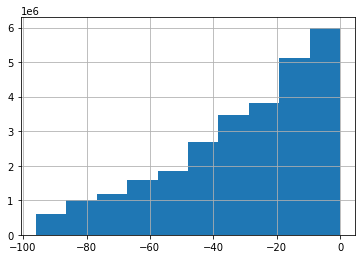

In [16]:
data['bureau_balance']['MONTHS_BALANCE'].hist()

A lot of months go back up to 100 (~8 years) so we should def consider using this as a feature that reduces the impact of DPD the farther back it was reported

In [17]:
# TODO() Validate these values
data['bureau']['AMT_CREDIT_DEBT_RATIO']

0          0.00000
1          0.76152
2          0.00000
3          0.00000
4          0.00000
            ...   
1716423    1.00000
1716424    0.00000
1716425    0.00000
1716426    0.00000
1716427    0.00000
Name: AMT_CREDIT_DEBT_RATIO, Length: 1716428, dtype: float64

### Summary

In short, I think we can utilize the DPD counts in `bureau_balances.csv` as a signal for determining the target. Intuitively the higher the count of DPD then the worse condition the load is currently in. Therefore, simply summing up this field per load should give us a good indication of how bad a previous load was for a user.

In addition, the `bureau.csv` is useful for retrieving the current sum/debt ratio, and also if there are any current DPD pendings. Keep in mind that a loan with zero DPD in the `bureau_balance.csv` does not mean that the current load does not have a zero DPD, and vise versa. So DPD should be taken from both CSVs.

Finally, if time permits, we should consider `MONTHS_BALANCE` as a signal that reduces the strength of the DPD penalty the more negative it is (i.e. the older the loan was). The intuition behind this is that a user's reliability can change over time, and their loan behavior is probably closer related to how they have recently been behaving rather than how they were behaving a long time ago.

In [18]:
def extract_features_from_bureau(bureau_df, bureau_balances_df):
    bureau_df['AMT_CREDIT_SUM_DEBT'] = bureau_df['AMT_CREDIT_SUM_DEBT'].fillna(value=0)
    bureau_df['AMT_CREDIT_DEBT_RATIO'] =  bureau_df['AMT_CREDIT_SUM_DEBT']/data['bureau']['AMT_CREDIT_SUM']
    bureau_df['AMT_CREDIT_DEBT_RATIO'] = bureau_df['AMT_CREDIT_DEBT_RATIO'].fillna(value=0)
    
    
    bureau_df = bureau_df.set_index('SK_ID_BUREAU')
    
    DPD_STATUS_MAP = {
        'C': 0, 
        'X': 0,
        '0': 0,
        '1': 1,
        '2': 2,
        '3': 3,
        '4': 4,
        '5': 5,
    }
    def sum_of_dpd(x):
        return x['STATUS'].map(DPD_STATUS_MAP).sum()

    dpd_counts_df = bureau_balances_df.groupby(['SK_ID_BUREAU']).apply(sum_of_dpd)
    
    dpd_counts_df = pd.DataFrame(dpd_counts_df, columns=['DPD_COUNTS']);
    bureau_with_dpds = pd.concat([bureau_df, dpd_counts_df], axis=1)
    
    bureau_with_dpds = bureau_with_dpds.set_index('SK_ID_CURR')
    
    return bureau_with_dpds[:][['AMT_CREDIT_DEBT_RATIO', 'CREDIT_DAY_OVERDUE', 'DPD_COUNTS']]